# Data-Driven Solution for the Korteweg-de Vries Equation

In this notebook, we aim to develop a data-driven approach to solve the Korteweg-de Vries (KdV) equation, which is a nonlinear partial differential equation commonly used to describe wave propagation in shallow water and other physical phenomena. Our approach utilizes a feedforward neural network to learn the relationship between spatial and temporal variables directly from the data.

## Steps Involved:

1. **Data Loading**:
   We start by loading the dataset, which consists of time (`tt`), spatial (`x`), and solution (`uu`) values obtained from simulations of the KdV equation. The dataset provides a comprehensive representation of the system's behavior over time and space.

2. **Data Preparation**:
   - We create a mesh grid of spatial and temporal variables to form a set of input-output pairs for training the neural network.
   - The input features consist of pairs of spatial and temporal values, while the output is the corresponding solution (`u(x,t)`).

3. **Neural Network Definition**:
   We define a simple feedforward neural network architecture with:
   - An input layer that accepts two features (spatial and temporal variables).
   - One or more hidden layers utilizing ReLU activation functions.
   - An output layer that produces the predicted solution (`uu`).

4. **Training the Model**:
   - The model is trained on the full dataset without any train-test split. We use Mean Squared Error (MSE) as the loss function and Adam optimizer for weight updates.
   - During training, the model learns to approximate the mapping from spatial and temporal inputs to the solution values by minimizing the loss.

5. **Making Predictions**:
   After training, we can use the model to make predictions at a fixed time point while varying the spatial variable. This allows us to observe how the solution evolves with respect to spatial changes at a specific moment in time.

6. **Visualization**:
   - We visualize the predicted solution at the specified fixed time along with actual data points from the dataset at a different time (e.g., \( t = 0.5 \)).
   - The predictions are plotted as a line, and the known data points are marked for comparison, providing insight into the model's performance.

By following this structured approach, we aim to leverage the power of neural networks to provide a robust approximation of the KdV equation's solution, facilitating further exploration and understanding of the underlying dynamics.


In [3]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import scipy.io
import matplotlib.pyplot as plt

In [4]:
sample_data = scipy.io.loadmat("/Users/yogra/Downloads/kdV.mat")
sample_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov 10 22:10:58 2017',
 '__version__': '1.0',
 '__globals__': [],
 'tt': array([[0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
         0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
         0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
         0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
         0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
         0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
         0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
         0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
         0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
         0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
         0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
         0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 

In [5]:
typ=['uu','tt','x']
for i in typ:
    print(sample_data[i].shape)

(512, 201)
(1, 201)
(1, 512)


In [6]:
tt = sample_data['tt'].flatten()
x = sample_data['x'].flatten()
uu = sample_data['uu']

In [7]:
X, Y = np.meshgrid(x, tt)
X_flat = np.column_stack((X.flatten(), Y.flatten()))
uu_flat = uu.flatten()

In [8]:
X_tensor = torch.tensor(X_flat, dtype=torch.float32)
uu_tensor = torch.tensor(uu_flat, dtype=torch.float32).unsqueeze(1)

In [9]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 64)  # Input layer: 2 inputs (x, t)
        self.fc2 = nn.Linear(64, 64) # Hidden layer
        self.fc3 = nn.Linear(64, 1)  # Output layer: 1 output (solution uu)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = torch.relu(self.fc2(x))  # Apply ReLU activation
        x = self.fc3(x)              # No activation at output
        return x

In [10]:
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)

In [11]:
epochs = 500
for epoch in range(epochs):
    y_pred = model(X_tensor)
    
    loss = criterion(y_pred, uu_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/500], Loss: 0.4791
Epoch [20/500], Loss: 0.4502
Epoch [30/500], Loss: 0.4054
Epoch [40/500], Loss: 0.3460
Epoch [50/500], Loss: 0.2870
Epoch [60/500], Loss: 0.2543
Epoch [70/500], Loss: 0.2407
Epoch [80/500], Loss: 0.2317
Epoch [90/500], Loss: 0.2248
Epoch [100/500], Loss: 0.2190
Epoch [110/500], Loss: 0.2139
Epoch [120/500], Loss: 0.2095
Epoch [130/500], Loss: 0.2057
Epoch [140/500], Loss: 0.2025
Epoch [150/500], Loss: 0.1994
Epoch [160/500], Loss: 0.1962
Epoch [170/500], Loss: 0.1934
Epoch [180/500], Loss: 0.1907
Epoch [190/500], Loss: 0.1880
Epoch [200/500], Loss: 0.1854
Epoch [210/500], Loss: 0.1831
Epoch [220/500], Loss: 0.1808
Epoch [230/500], Loss: 0.1787
Epoch [240/500], Loss: 0.1769
Epoch [250/500], Loss: 0.1753
Epoch [260/500], Loss: 0.1741
Epoch [270/500], Loss: 0.1727
Epoch [280/500], Loss: 0.1717
Epoch [290/500], Loss: 0.1704
Epoch [300/500], Loss: 0.1692
Epoch [310/500], Loss: 0.1682
Epoch [320/500], Loss: 0.1674
Epoch [330/500], Loss: 0.1665
Epoch [340/500], Lo

In [12]:
t_fixed = tt[len(tt) // 2]

In [13]:
X_fixed_time = np.column_stack((x, np.full_like(x, t_fixed)))

In [14]:
X_fixed_time_tensor = torch.tensor(X_fixed_time, dtype=torch.float32)

In [15]:
with torch.no_grad():
    uu_fixed_time_pred = model(X_fixed_time_tensor).numpy()

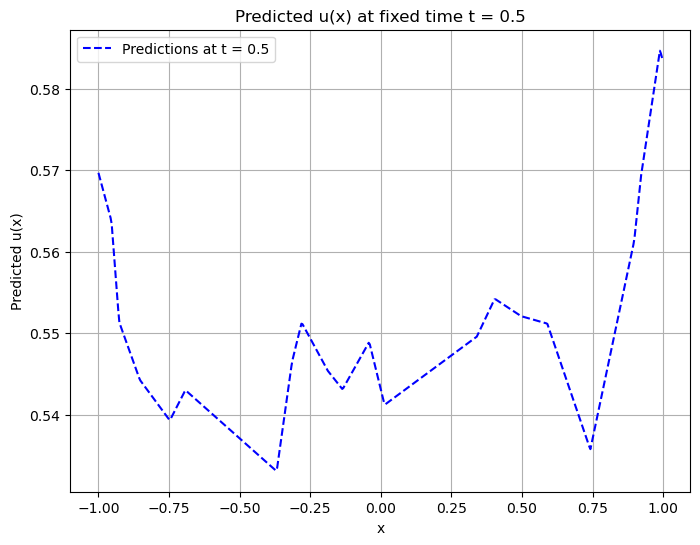

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(x, uu_fixed_time_pred, label=f'Predictions at t = {t_fixed}', color='blue', linestyle='--')
plt.title(f'Predicted u(x) at fixed time t = {t_fixed}')
plt.xlabel('x')
plt.ylabel('Predicted u(x)')
plt.legend()
plt.grid(True)
plt.show()